In [1]:
cd /home/roberto/Documents/Carrera/romain_ic/wavemixing_project/src

/home/roberto/Documents/Carrera/romain_ic/wavemixing_project/src


In [2]:
import os
import sys

sys.path.insert(0, os.path.abspath("./post_processing/local_calculations"))
sys.path.insert(0, os.path.abspath("./helper_functions/cloud"))
sys.path.insert(0, os.path.abspath("./file_manager"))
sys.path.insert(0, os.path.abspath("./hamiltonian"))
sys.path.insert(0, os.path.abspath("./correlation"))
sys.path.insert(0, os.path.abspath("./single_and_double_excitations_subspace"))

In [3]:
from qutip import *
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

from hamiltonian.hamiltonian_builder import *


from helper_functions.operators import *
from helper_functions.cloud import *
from file_manager.visualization_preparation_tools import *
from correlation.second_order_correlation  import *
from single_and_double_excitations_subspace.parameter_generator_for_ODE import *
from single_and_double_excitations_subspace.atomic_contributions_ODE import *
from single_and_double_excitations_subspace.atomic_contributions_optimized_ODE import SolveForBeta1DandBeta2D_optimized

from single_and_double_excitations_subspace.QRT_dynamics_ODE import *

from single_and_double_excitations_subspace.MC_dynamics_ODE import get_g2_full_MonteCarlo

from post_processing.local_calculations import *
from helper_functions.cloud import *
from helper_functions.operators import *
from helper_functions.other import * 

In [4]:
def relative_error(A,B):
    try:
        return np.average(np.abs((A-B)/(A+B)), axis = 0)
    except:
        return (np.abs((A-B)/(A+B)))


In [5]:
#Initial parameters
N_atoms = N = 20
b0 = 10
r = random_cloud(0, N, exc_radius = None, b0 = b0)

R1 = get_nhat_from_angle(25)
R2 = get_nhat_from_angle(205)

Omega = 6
Delta = 20

tf_steady_state = 20
t_span_steady_state, dt = np.linspace(0,tf_steady_state,100, retstep = True) 

In [6]:
taulist, dt = np.linspace(0, tf_steady_state, 200, retstep=True)

In [7]:
g2_no_interaction_list =  []
g2_interaction_list =  []

In [8]:
for i in range(4):
    
    print(i)
    
    r = random_cloud(0, N, exc_radius = None, b0 = b0)

    g2_no_interaction = get_g2_full_MonteCarlo(Omega, Delta, r, t_span_steady_state, R1, R2, steady_state_interaction = False)
    g2_interaction = get_g2_full_MonteCarlo(Omega, Delta, r, t_span_steady_state, R1, R2, steady_state_interaction = True)

    g2_no_interaction_list.append(g2_no_interaction)
    g2_interaction_list.append(g2_interaction)
    
    
    #plt.title(f"Configuration {i+1}. Error = {np.round(relative_error(g2_interaction[0], g2_no_interaction[0]),3)}")
    #plt.plot(taulist, g2_interaction[0])
    #plt.plot(taulist, g2_no_interaction[0])
    

0
1
2
3


IndexError: list index out of range

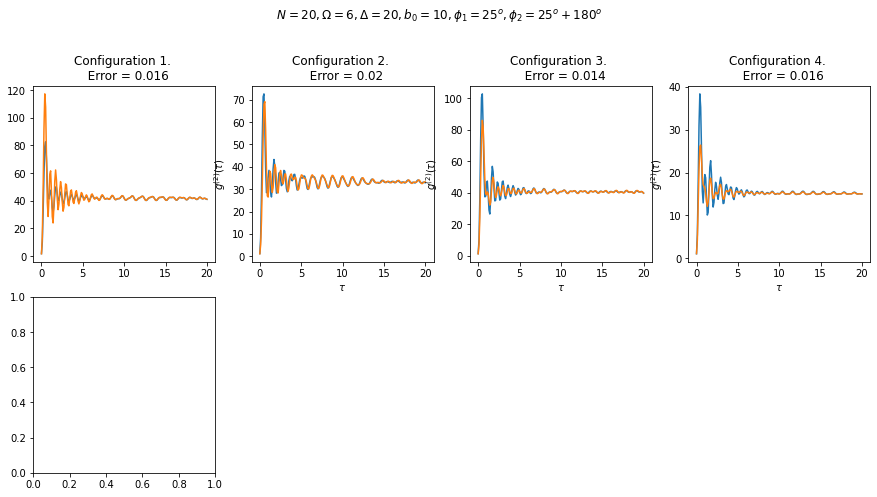

In [9]:
fig = plt.figure(figsize = (15,11))


plt.subplot(3,4,1)

plt.suptitle(f" $ N = {N}, \Omega = {Omega}, \Delta = {Delta}, b_0 = {b0} , \phi_1 = 25^o, \phi_2 = 25^o+180^o $ ", size = "large")

plt.title(f"Configuration {1}. \n  Error = {np.round(relative_error(np.array(g2_interaction[0]), np.array(g2_no_interaction[0])),3)}")
plt.plot(taulist, np.abs(g2_no_interaction_list[0][0]), label = "Steady-State with interactions")
plt.plot(taulist, np.abs(g2_interaction_list[0][0]), label = "Steady-State without interactions")

for i in range(1,12):
        
    plt.subplot(3,4,i+1)
    
    g2_no_interaction = g2_no_interaction_list[i]
    g2_interaction = g2_interaction_list[i]
        
    plt.title(f"Configuration {i+1}. \n  Error = {np.round(relative_error(np.array(g2_interaction[0]), np.array(g2_no_interaction[0])),3)}")
    
    plt.plot(taulist, np.abs(g2_interaction[0]))
    plt.plot(taulist, np.abs(g2_no_interaction[0]))
    
    plt.ylabel(r"$g^{(2)}(\tau)$")
    plt.xlabel(r"$\tau$")
    
plt.legend()
    
plt.tight_layout()